## Análise e Geração de Gráficos

In [11]:
!pip install seaborn

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Import e Tratamento dos dados da otimização de hiperparâmetros 

In [13]:
results = pd.read_csv("pinns/heat_equation/results.csv")

In [14]:
def convert_to_array(s):
    s = s.replace('\n', '')  # Remove \n
    s = s.replace('[', '').replace(']', '')  # Remove colchetes
    array = np.array([float(x) for x in s.split()])  # Converte para array NumPy
    return array

In [15]:
results['Solução Predita'] = results['Solução Predita'].apply(convert_to_array)

In [16]:
results

,ID,Taxa de Aprendizado,Número de Camadas Ocultas,Número de Neurônios por Camada,Ativação,Solução Predita,Loss Treino,Loss Teste,Error HPO
0,0,0.001000,5,60,tanh,"[-0.00183828734, -0.000543972477, 0.0004052314...",[46.596695 1.4071515 1.5627694 1.067691...,[46.523514 1.3962071 1.5410863 1.039544...,0.506162
1,1,0.005047,7,57,sigmoid,"[-0.000957590528, -0.00113264937, -0.001403671...",[36.885338 1.5655725 1.7561948 1.010643...,[36.885334 1.4857606 1.7547795 1.002903...,0.867047
2,2,0.005200,7,92,Swish,"[-0.00135459751, -0.00157427788, -0.0016537681...",[49.861744 1.0534258 0.65282285 0.495362...,[49.861744 0.97383416 0.5989841 0.377486...,0.227131
3,3,0.000750,9,76,Swish,"[0.00101778982, 0.0013045962, 0.000369306188, ...",[49.936134 1.275153 1.0696325 1.019045...,[49.936134 1.2406564 1.0567294 1.007289...,0.392649
4,4,0.002073,4,107,sin,"[0.000483799726, 0.00663768873, 0.00739055499,...",[90.10408 1.7087182 1.1525046 1.442744...,[90.06584 1.6736732 1.1165973 1.389314...,0.544374
5,5,0.000582,8,36,tanh,"[-0.000365038402, 0.00101391505, 0.0020154519,...",[54.81161 1.998804 1.1911974 0.994570...,[54.77651 1.9542557 1.1634498 0.983092...,0.744987
6,6,0.047441,8,43,sigmoid,"[0.49950051, 0.49950054, 0.49950054, 0.4995006...",[128.34947 25.024975 25.024975 25.024975 ...,[128.34947 25.024977 25.024975 25.024977 ...,25.024975
7,7,0.007992,3,12,Swish,"[-0.00508045405, -0.00669517368, -0.0088912025...",[49.527275 1.5615915 1.2604032 1.095614...,[49.52859 1.5009457 1.2108176 1.073736...,0.862672
8,8,0.036846,8,92,tanh,"[0.49950361, 0.49950343, 0.49950337, 0.4995032...",[41.630314 25.024918 25.024982 25.024977 25.02...,[41.591385 25.024918 25.024982 25.024977 25.02...,25.024918
9,9,0.005114,5,49,Swish,"[0.00068363687, 0.000206869096, -0.00019999314...",[49.19564 1.1119356 1.0610662 0.888413...,[49.195717 1.1044525 1.0370125 0.805044...,0.157221


### Gráfico Comparativo usando a seção x = 5, t = 2 * pi

In [17]:
# Ordenar os resultados pela 'Loss'
sorted_results = results.sort_values(by='Loss Teste')

In [18]:
# Pega o top 10
top_10_results = sorted_results.head(10)

In [19]:
# Configurações do Seaborn
palette = sns.color_palette("rocket")
sns.set_palette(palette)
sns.set_style("ticks", {'axes.grid': True})

# Criar a figura e o eixo
fig, ax1 = plt.subplots(figsize=(16, 8))

# Definir os rótulos dos eixos com LaTeX
ax1.set_xlabel(r'$y$', fontsize=14)
ax1.set_ylabel(r'$u(x = 5, y, t = 2\pi)$', fontsize=14)

# Número de valores
num_values = 128
y = np.linspace(0, 10, num_values).reshape(-1, 1)

# Plotar as linhas com Seaborn
for i, (_, result) in enumerate(top_10_results.iterrows()):
    label = f"{result['ID']} - LR: {result['Taxa de Aprendizado']}, Layers: {result['Número de Camadas Ocultas']}, Nodes: {result['Número de Neurônios por Camada']}, Activ.: {result['Ativação']}"
    sns.lineplot(x=y.flatten(), y=result['Solução Predita'], linewidth=2, label=label, ax=ax1)

# Adicionar a legenda
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Salvar a figura
fig.savefig('pinns/gaussian_pulse/plots/comparison_plot', bbox_inches='tight')
plt.close(fig)

### Gráfico comparativo log(loss) x sort(m)

In [22]:
# Função para converter string para array numpy de floats
def str_to_list(s):
    # Remove os colchetes e converte para lista de floats
    float_list = list(map(float, s.strip('[]').split()))
    # Converte a lista para um array numpy
    return sum(float_list)

# Aplica a função a cada linha da coluna "Loss Treino"
sorted_results["Loss Treino"] = sorted_results["Loss Treino"].apply(str_to_list)

print(sorted_results["Loss Teste"])

AttributeError: 'float' object has no attribute 'strip'

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log10 method

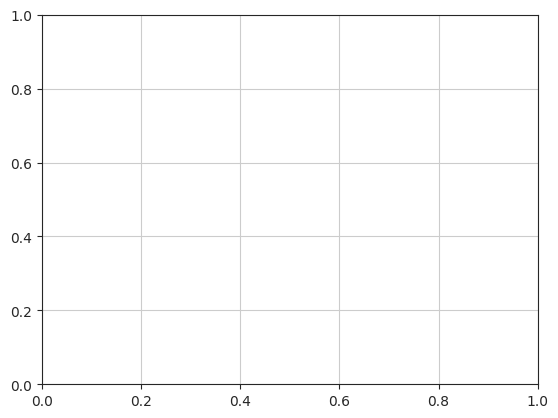

In [21]:
# Criação do gráfico de pontos
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(0, 50, 1), y=np.log10(sorted_results['Loss Teste']), marker='*', ax=ax)

# Configuração dos eixos e título
ax.set_xlabel('Ranking')
ax.set_ylabel(r'$log_{10}(\mathcal{L}_{\theta^{*}}[\lambda]$)')

# Ajustes adicionais para melhorar a visualização em escala logarítmica
ax.grid(True, which="both", ls="--")
ax.minorticks_on()

# Salvar o gráfico
fig.savefig('pinns/gaussian_pulse/plots/loss_hpo.png', bbox_inches='tight')
plt.close(fig)

### Gráfico comparando melhor solução contra solver numérico

In [ ]:
sol_malha_128 = pd.read_csv("pinns/gaussian_pulse/sol_malha_128x128.csv")

In [ ]:
sol_malha_128.head()

,u,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,0.000000e+00,1,0.000000,5,0.000000,0
1,-1.874100e-09,1,0.078125,5,0.078125,0
2,-1.980800e-11,1,0.156250,5,0.156250,0
3,8.355700e-10,1,0.234380,5,0.234380,0
4,-1.712200e-12,1,0.312500,5,0.312500,0


In [ ]:
# Criar a figura e o eixo
fig, ax1 = plt.subplots(figsize=(16, 8))

# Definir os rótulos dos eixos com LaTeX
ax1.set_xlabel(r'$y$', fontsize=14)
ax1.set_ylabel(r'$u(x = 5, y, t = 2\pi)$', fontsize=14)

#Plot do melhor modelo
label = f"{sorted_results.iloc[0]['ID']} - LR: {sorted_results.iloc[0]['Taxa de Aprendizado']}, Layers: {sorted_results.iloc[0]['Número de Camadas Ocultas']}, Nodes: {sorted_results.iloc[0]['Número de Neurônios por Camada']}, Activ.: {sorted_results.iloc[0]['Ativação']}"
sns.lineplot(x=y.flatten(), y=sorted_results.iloc[0]['Solução Predita'], linewidth=2, label=label, ax=ax1)

label = f"Solver Numérico"
sns.lineplot(x=y.flatten(), y=sol_malha_128.iloc[:-1]["u"], linewidth=2, label=label, ax=ax1)

# Salvar a figura
fig.savefig('pinns/gaussian_pulse/plots/best_compare_solver.png', bbox_inches='tight')
plt.close(fig)